# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [61]:
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

In [62]:
#LOAD THE DATA
data = pd.read_csv('water_potability.csv')

data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Fill in Nan values with the mean of the column

In [63]:
data.interpolate(inplace=True, method='linear', axis=0, limit_direction='both')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,364.639673,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,360.762904,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [64]:
rows, cols = data.shape
rows, cols

(3276, 10)

Plot the Data Appropriately

In [65]:
X = data.drop('Potability', axis=1).values
y = data['Potability'].values

In [66]:

from sklearn.model_selection import train_test_split
X_remain, X_test, y_remain, y_test = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val = train_test_split(X_remain, y_remain, test_size=0.15)

## Scale data using StandardScaler

In [67]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X=X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = np.clip(X_train, -5, 5)
X_val = np.clip(X_val, -5, 5)
X_test = np.clip(X_test, -5, 5)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((2366, 9), (418, 9), (492, 9), (2366,), (418,), (492,))

# Each Memeber Defines their model Here

In [68]:
#Model Definition by member 1
def create_model():
  model  = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.05),input_shape=(X.shape[1],)),

    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], )

  return model

In [69]:
mymodel = create_model()
mymodel.summary()

/Users/apple/Documents/dev/ALU/Assignments/water-quality_model/myenv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                │ (None, 512)            │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,665 (694.00 KB)

 Trainable params: 177,665 (694.00 KB)

 Non-trainable params: 0 (0.00 B)

# Start the training Process

Epoch 1/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5965 - loss: 1.2680 - val_accuracy: 0.6362 - val_loss: 0.7451
Epoch 2/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6257 - loss: 0.7031 - val_accuracy: 0.6585 - val_loss: 0.6478
Epoch 3/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6471 - loss: 0.6514 - val_accuracy: 0.6809 - val_loss: 0.6418
Epoch 4/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: 0.6324 - val_accuracy: 0.6707 - val_loss: 0.6429
Epoch 5/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6514 - loss: 0.6521 - val_accuracy: 0.6992 - val_loss: 0.6148
Epoch 6/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6877 - loss: 0.6344 - val_accuracy: 0.6870 - val_loss: 0.6290
Epoch 7/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.6111 - val_accuracy: 0.6606 - val_loss: 0.6407
Epoch 8/14
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6700 - loss: 0.6315 - val_accuracy: 0.6809 - val_loss:

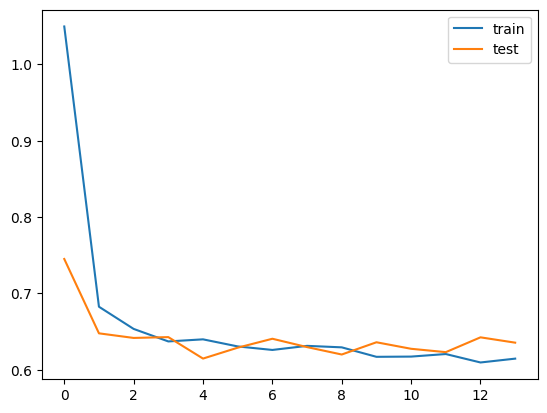

In [70]:

#fit model

history = mymodel.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=14, verbose=1)
# evaluate the model
_, train_acc = mymodel.evaluate(X_train, y_train, verbose=0)
_, test_acc = mymodel.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))



# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Save Model

In [72]:
# Save the model
mymodel.save('model.h5')